# Part III : Time-Series Forecasting using RNN

Air Quality Dataset: Hourly air quality data with various features like temperature, humidity, and gas concentrations



In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd ..
%cd /content/drive/MyDrive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive
/content/drive/MyDrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
features = pd.read_csv('/content/drive/MyDrive/Sem_2/DL/Assignment_1/Features data set.csv')
sales = pd.read_csv('/content/drive/MyDrive/Sem_2/DL/Assignment_1/sales data-set.csv')
stores = pd.read_csv('/content/drive/MyDrive/Sem_2/DL/Assignment_1/stores data-set.csv')

features = features.merge(stores, on = 'Store')
dataset = features.merge(sales, on = ['Store','Date','IsHoliday'])
dataset=dataset.fillna(0)

display(dataset)

print(dataset.shape)

dataset.describe()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
0,1,05/02/2010,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315,1,24924.50
1,1,05/02/2010,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315,2,50605.27
2,1,05/02/2010,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315,3,13740.12
3,1,05/02/2010,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315,4,39954.04
4,1,05/02/2010,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315,5,32229.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,93,2487.80
421566,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,94,5203.31
421567,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,95,56017.47
421568,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,97,6817.48


(421570, 16)


,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,136727.915739,44.260317,15981.258123
std,12.785297,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,60980.583328,30.492054,22711.183519
min,1.000000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000,1.000000,-4988.940000
25%,11.000000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000,18.000000,2079.650000
50%,22.000000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,140167.000000,37.000000,7612.030000
75%,33.000000,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,202505.000000,74.000000,20205.852500
max,45.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,99.000000,693099.360000


<Axes: xlabel='Date'>

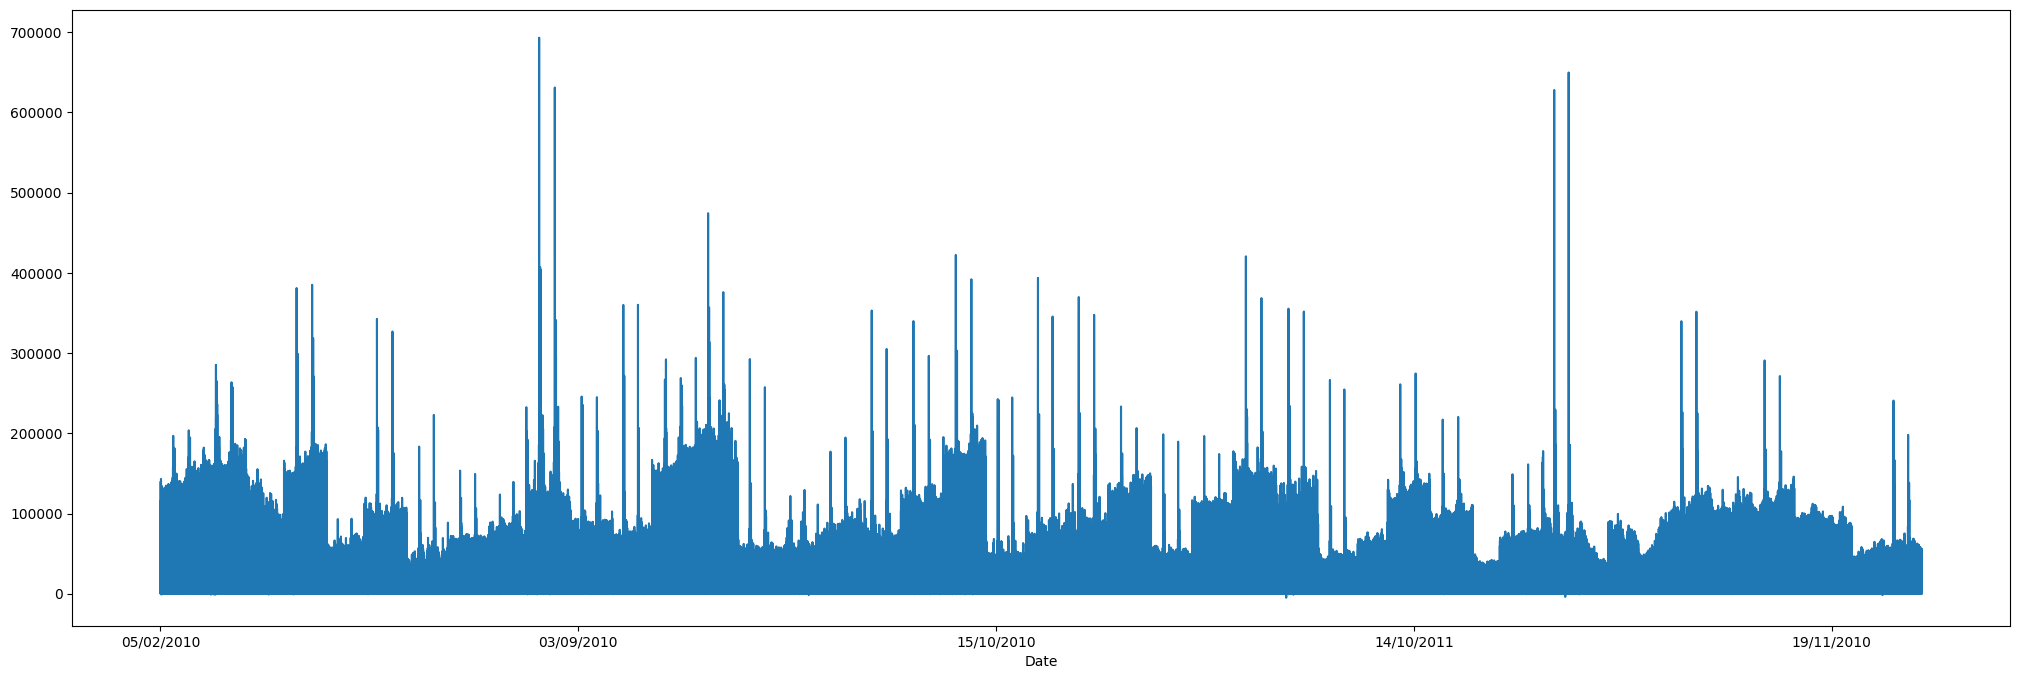

In [ ]:
# set the index to the date column, make sure its in the datetime format
dataset = dataset.set_index('Date')
dataset['Weekly_Sales'].plot(figsize=(25,8))

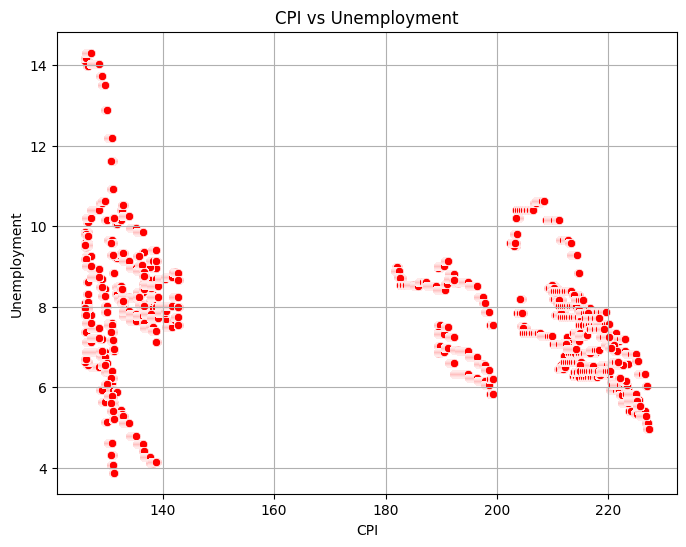

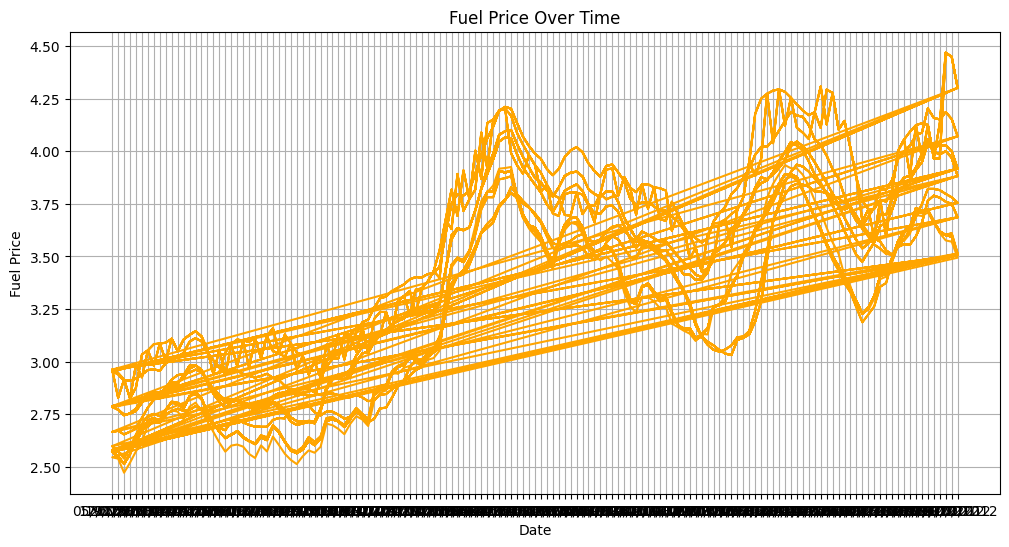

In [ ]:
# Visualize CPI vs Unemployment
plt.figure(figsize=(8, 6))
sns.scatterplot(x='CPI', y='Unemployment', data=dataset, color='red')
plt.title('CPI vs Unemployment')
plt.xlabel('CPI')
plt.ylabel('Unemployment')
plt.grid(True)
plt.show()

# Visualize Fuel Price over time
plt.figure(figsize=(12, 6))
plt.plot(dataset.index, dataset['Fuel_Price'], color='orange')
plt.title('Fuel Price Over Time')
plt.xlabel('Date')
plt.ylabel('Fuel Price')
plt.grid(True)
plt.show()

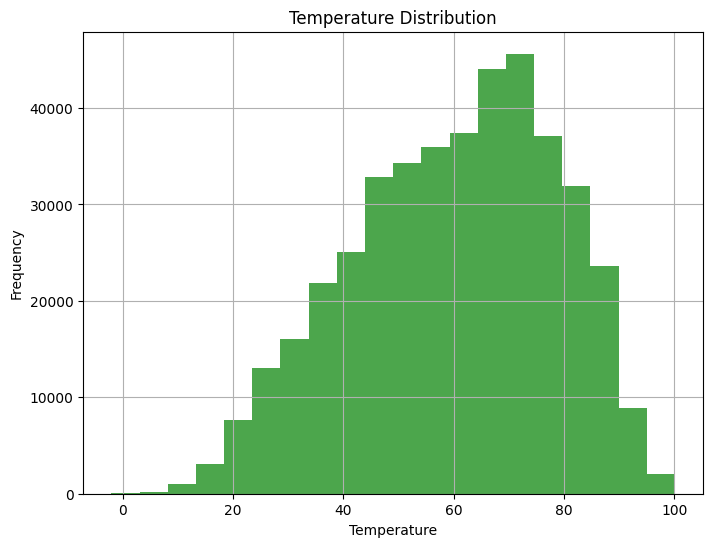

In [ ]:
# Visualize Temperature distribution
plt.figure(figsize=(8, 6))
plt.hist(dataset['Temperature'], bins=20, color='green', alpha=0.7)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# sort the dataframe by date
dataset = dataset.sort_values(by='Date')

dataset['Date'] = pd.to_datetime(dataset['Date'])

# make new columns from the day, month, and year
dataset['Day'] = dataset['Date'].dt.day
dataset['Month'] = dataset['Date'].dt.month
dataset['Year'] = dataset['Date'].dt.year
dataset.drop(['Date', 'Type'], axis=1, inplace=True)

display(dataset)


<ipython-input-27-9b3ebce059cd>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dataset['Date'] = pd.to_datetime(dataset['Date'])


,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Size,Dept,Weekly_Sales,Day,Month,Year
261048,27,37.27,3.811,0.0,0.0,0.0,0.0,0.0,137.955893,7.725,False,204184,20,9880.30,4,1,2011
33836,4,56.99,3.521,0.0,0.0,0.0,0.0,0.0,128.719935,5.946,False,205863,4,51382.98,4,1,2011
33835,4,56.99,3.521,0.0,0.0,0.0,0.0,0.0,128.719935,5.946,False,205863,3,11476.27,4,1,2011
33834,4,56.99,3.521,0.0,0.0,0.0,0.0,0.0,128.719935,5.946,False,205863,2,87803.95,4,1,2011
33833,4,56.99,3.521,0.0,0.0,0.0,0.0,0.0,128.719935,5.946,False,205863,1,33809.56,4,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131398,14,29.67,3.179,0.0,0.0,0.0,0.0,0.0,182.571448,8.724,True,200898,14,20582.52,31,12,2010
131397,14,29.67,3.179,0.0,0.0,0.0,0.0,0.0,182.571448,8.724,True,200898,13,48227.71,31,12,2010
131396,14,29.67,3.179,0.0,0.0,0.0,0.0,0.0,182.571448,8.724,True,200898,12,2633.58,31,12,2010
23509,3,53.20,2.943,0.0,0.0,0.0,0.0,0.0,214.698647,7.564,True,37392,87,912.69,31,12,2010


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)

In [ ]:
window_size = 10

# Sequences of the data
sequences = []
for i in range(len(scaled_data) - window_size):
    sequences.append(scaled_data[i:i+window_size])

# Convert sequences to numpy array
sequences = np.array(sequences)

# Split data into input (X) and output (y)
X = sequences[:, :-1]
y = sequences[:, -1][:,-1]

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.Tensor(X_train)
X_test_tensor = torch.Tensor(X_test)
X_val_tensor = torch.Tensor(X_val)
y_train_tensor = torch.Tensor(y_train)
y_test_tensor = torch.Tensor(y_test)
y_val_tensor = torch.Tensor(y_val)



In [ ]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out


Epoch [1/30], Train Loss: 0.3246, Val Loss: 0.2562, Test Loss: 0.2576
Epoch [2/30], Train Loss: 0.2576, Val Loss: 0.2016, Test Loss: 0.2026
Epoch [3/30], Train Loss: 0.2026, Val Loss: 0.1594, Test Loss: 0.1599
Epoch [4/30], Train Loss: 0.1599, Val Loss: 0.1302, Test Loss: 0.1303
Epoch [5/30], Train Loss: 0.1303, Val Loss: 0.1149, Test Loss: 0.1146
Epoch [6/30], Train Loss: 0.1146, Val Loss: 0.1126, Test Loss: 0.1120
Epoch [7/30], Train Loss: 0.1121, Val Loss: 0.1184, Test Loss: 0.1175
Epoch [8/30], Train Loss: 0.1176, Val Loss: 0.1236, Test Loss: 0.1227
Epoch [9/30], Train Loss: 0.1227, Val Loss: 0.1223, Test Loss: 0.1214
Epoch [10/30], Train Loss: 0.1215, Val Loss: 0.1141, Test Loss: 0.1133
Epoch [11/30], Train Loss: 0.1133, Val Loss: 0.1019, Test Loss: 0.1012
Epoch [12/30], Train Loss: 0.1012, Val Loss: 0.0891, Test Loss: 0.0886
Epoch [13/30], Train Loss: 0.0886, Val Loss: 0.0785, Test Loss: 0.0781
Epoch [14/30], Train Loss: 0.0781, Val Loss: 0.0712, Test Loss: 0.0710
Epoch [15/30], 

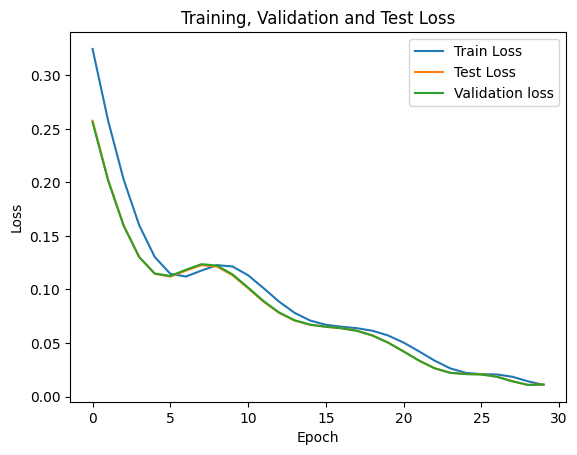

Test Loss: 0.0111898984760046


In [ ]:
from torch.autograd import Variable
# Define hyperparameters
input_size = X_train_tensor.shape[2]
hidden_size = 64
output_size = 1
learning_rate = 0.001
num_epochs = 30

model = RNN(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
train_losses = []
test_losses = []
val_losses = []

# Train the model
for epoch in range(num_epochs):
    inputs = Variable(X_train_tensor)
    labels = Variable(y_train_tensor)

    optimizer.zero_grad()

    outputs = model(inputs)

    loss = criterion(outputs.view(-1), labels)
    loss.backward()
    train_losses.append(loss.item())
    optimizer.step()

    # Validation phase
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs.view(-1), y_val_tensor)
        val_losses.append(val_loss.item())

    with torch.no_grad():
        model.eval()
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs.view(-1), y_test_tensor)
        test_losses.append(test_loss.item())

    if (epoch+1) % 1 == 0:
      print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}, Test Loss: {test_loss.item():.4f}')


# Plot the training and test loss
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.plot(val_losses, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training, Validation and Test Loss')
plt.legend()
plt.show()


# Evaluate the model
with torch.no_grad():
    inputs = Variable(X_test_tensor)
    labels = Variable(y_test_tensor)
    outputs = model(inputs)
    loss = criterion(outputs.view(-1), labels)
    print('Test Loss:', loss.item())

Epoch [1/30], Train Loss: 0.2847, Val Loss: 0.1845, Test Loss: 0.1848
Epoch [2/30], Train Loss: 0.1848, Val Loss: 0.1418, Test Loss: 0.1410
Epoch [3/30], Train Loss: 0.1412, Val Loss: 0.1512, Test Loss: 0.1497
Epoch [4/30], Train Loss: 0.1500, Val Loss: 0.1518, Test Loss: 0.1502
Epoch [5/30], Train Loss: 0.1505, Val Loss: 0.1294, Test Loss: 0.1280
Epoch [6/30], Train Loss: 0.1282, Val Loss: 0.1060, Test Loss: 0.1051
Epoch [7/30], Train Loss: 0.1052, Val Loss: 0.0920, Test Loss: 0.0914
Epoch [8/30], Train Loss: 0.0915, Val Loss: 0.0858, Test Loss: 0.0854
Epoch [9/30], Train Loss: 0.0855, Val Loss: 0.0815, Test Loss: 0.0813
Epoch [10/30], Train Loss: 0.0813, Val Loss: 0.0740, Test Loss: 0.0739
Epoch [11/30], Train Loss: 0.0739, Val Loss: 0.0609, Test Loss: 0.0608
Epoch [12/30], Train Loss: 0.0608, Val Loss: 0.0434, Test Loss: 0.0433
Epoch [13/30], Train Loss: 0.0433, Val Loss: 0.0269, Test Loss: 0.0268
Epoch [14/30], Train Loss: 0.0267, Val Loss: 0.0188, Test Loss: 0.0187
Epoch [15/30], 

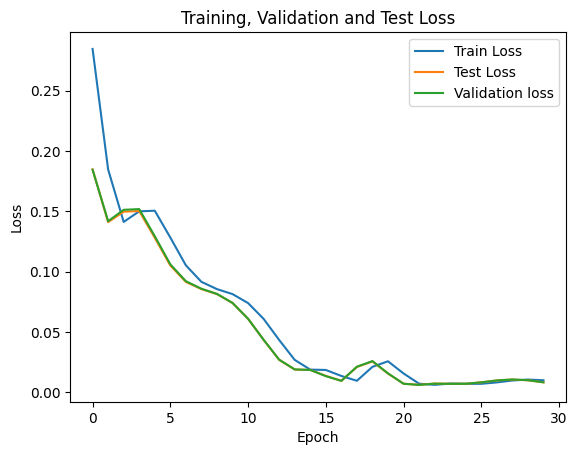

Test Loss: 0.008119210600852966


In [ ]:
from torch.autograd import Variable
# Define hyperparameters
input_size = X_train_tensor.shape[2]
hidden_size = 128
output_size = 1
learning_rate = 0.001
num_epochs = 30

model = RNN(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
train_losses = []
test_losses = []
val_losses = []

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
train_losses = []
test_losses = []
val_losses = []

# Train the model
for epoch in range(num_epochs):
    inputs = Variable(X_train_tensor)
    labels = Variable(y_train_tensor)

    optimizer.zero_grad()

    outputs = model(inputs)

    loss = criterion(outputs.view(-1), labels)
    loss.backward()
    train_losses.append(loss.item())
    optimizer.step()

    # Validation phase
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs.view(-1), y_val_tensor)
        val_losses.append(val_loss.item())

    with torch.no_grad():
        model.eval()
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs.view(-1), y_test_tensor)
        test_losses.append(test_loss.item())

    if (epoch+1) % 1 == 0:
      print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}, Test Loss: {test_loss.item():.4f}')


# Plot the training and test loss
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.plot(val_losses, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training, Validation and Test Loss')
plt.legend()
plt.show()


# Evaluate the model
with torch.no_grad():
    inputs = Variable(X_test_tensor)
    labels = Variable(y_test_tensor)
    outputs = model(inputs)
    loss = criterion(outputs.view(-1), labels)
    print('Test Loss:', loss.item())

Epoch [1/15], Train Loss: 0.2761, Val Loss: 0.2152, Test Loss: 0.2156
Epoch [2/15], Train Loss: 0.2155, Val Loss: 0.1733, Test Loss: 0.1732
Epoch [3/15], Train Loss: 0.1732, Val Loss: 0.1496, Test Loss: 0.1490
Epoch [4/15], Train Loss: 0.1491, Val Loss: 0.1425, Test Loss: 0.1415
Epoch [5/15], Train Loss: 0.1417, Val Loss: 0.1462, Test Loss: 0.1449
Epoch [6/15], Train Loss: 0.1451, Val Loss: 0.1504, Test Loss: 0.1490
Epoch [7/15], Train Loss: 0.1492, Val Loss: 0.1488, Test Loss: 0.1473
Epoch [8/15], Train Loss: 0.1476, Val Loss: 0.1413, Test Loss: 0.1399
Epoch [9/15], Train Loss: 0.1401, Val Loss: 0.1308, Test Loss: 0.1296
Epoch [10/15], Train Loss: 0.1298, Val Loss: 0.1203, Test Loss: 0.1193
Epoch [11/15], Train Loss: 0.1195, Val Loss: 0.1115, Test Loss: 0.1106
Epoch [12/15], Train Loss: 0.1107, Val Loss: 0.1048, Test Loss: 0.1040
Epoch [13/15], Train Loss: 0.1042, Val Loss: 0.1000, Test Loss: 0.0993
Epoch [14/15], Train Loss: 0.0995, Val Loss: 0.0963, Test Loss: 0.0958
Epoch [15/15], 

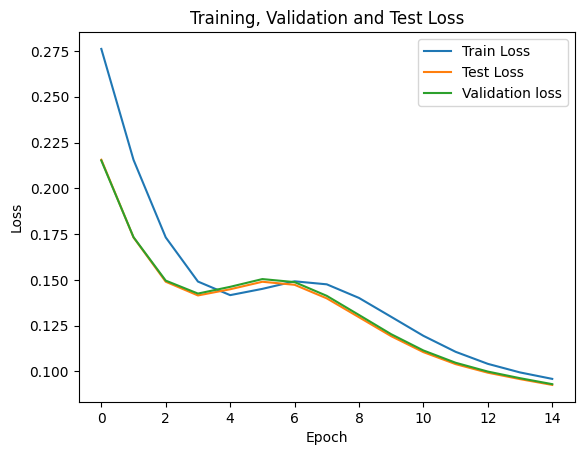

Test Loss: 0.09265869110822678


In [ ]:
from torch.autograd import Variable
# Define hyperparameters
input_size = X_train_tensor.shape[2]
hidden_size = 64
output_size = 1
learning_rate = 0.001
num_epochs = 15

model = RNN(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
train_losses = []
test_losses = []
val_losses = []

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
train_losses = []
test_losses = []
val_losses = []

# Train the model
for epoch in range(num_epochs):
    inputs = Variable(X_train_tensor)
    labels = Variable(y_train_tensor)

    optimizer.zero_grad()

    outputs = model(inputs)

    loss = criterion(outputs.view(-1), labels)
    loss.backward()
    train_losses.append(loss.item())
    optimizer.step()

    # Validation phase
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs.view(-1), y_val_tensor)
        val_losses.append(val_loss.item())

    with torch.no_grad():
        model.eval()
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs.view(-1), y_test_tensor)
        test_losses.append(test_loss.item())

    if (epoch+1) % 1 == 0:
      print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}, Test Loss: {test_loss.item():.4f}')


# Plot the training and test loss
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.plot(val_losses, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training, Validation and Test Loss')
plt.legend()
plt.show()


# Evaluate the model
with torch.no_grad():
    inputs = Variable(X_test_tensor)
    labels = Variable(y_test_tensor)
    outputs = model(inputs)
    loss = criterion(outputs.view(-1), labels)
    print('Test Loss:', loss.item())

Epoch [1/30], Train Loss: 0.3541, Val Loss: 0.2467, Test Loss: 0.2450
Epoch [2/30], Train Loss: 0.2449, Val Loss: 0.1089, Test Loss: 0.1087
Epoch [3/30], Train Loss: 0.1087, Val Loss: 0.1195, Test Loss: 0.1197
Epoch [4/30], Train Loss: 0.1197, Val Loss: 0.0857, Test Loss: 0.0857
Epoch [5/30], Train Loss: 0.0857, Val Loss: 0.0607, Test Loss: 0.0603
Epoch [6/30], Train Loss: 0.0603, Val Loss: 0.0656, Test Loss: 0.0652
Epoch [7/30], Train Loss: 0.0652, Val Loss: 0.0201, Test Loss: 0.0200
Epoch [8/30], Train Loss: 0.0200, Val Loss: 0.0389, Test Loss: 0.0389
Epoch [9/30], Train Loss: 0.0388, Val Loss: 0.0142, Test Loss: 0.0142
Epoch [10/30], Train Loss: 0.0141, Val Loss: 0.0434, Test Loss: 0.0440
Epoch [11/30], Train Loss: 0.0440, Val Loss: 0.0097, Test Loss: 0.0099
Epoch [12/30], Train Loss: 0.0099, Val Loss: 0.0118, Test Loss: 0.0118
Epoch [13/30], Train Loss: 0.0118, Val Loss: 0.0207, Test Loss: 0.0207
Epoch [14/30], Train Loss: 0.0207, Val Loss: 0.0146, Test Loss: 0.0146
Epoch [15/30], 

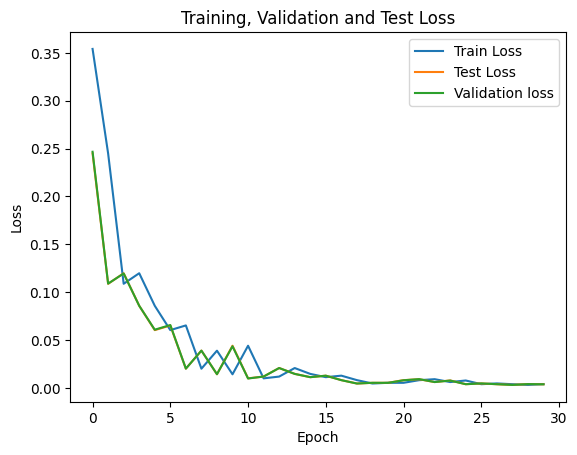

Test Loss: 0.003693058853968978


In [ ]:
from torch.autograd import Variable
# Define hyperparameters
input_size = X_train_tensor.shape[2]
hidden_size = 64
output_size = 1
learning_rate = 0.01
num_epochs = 30

model = RNN(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
train_losses = []
test_losses = []
val_losses = []

# Train the model
for epoch in range(num_epochs):
    inputs = Variable(X_train_tensor)
    labels = Variable(y_train_tensor)

    optimizer.zero_grad()

    outputs = model(inputs)

    loss = criterion(outputs.view(-1), labels)
    loss.backward()
    train_losses.append(loss.item())
    optimizer.step()

    # Validation phase
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs.view(-1), y_val_tensor)
        val_losses.append(val_loss.item())

    with torch.no_grad():
        model.eval()
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs.view(-1), y_test_tensor)
        test_losses.append(test_loss.item())

    if (epoch+1) % 1 == 0:
      print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}, Test Loss: {test_loss.item():.4f}')


# Plot the training and test loss
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.plot(val_losses, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training, Validation and Test Loss')
plt.legend()
plt.show()


# Evaluate the model
with torch.no_grad():
    inputs = Variable(X_test_tensor)
    labels = Variable(y_test_tensor)
    outputs = model(inputs)
    loss = criterion(outputs.view(-1), labels)
    print('Test Loss:', loss.item())

In [ ]:
torch.save(model.state_dict(), '/content/best_model_weights_part3_gru.h5')

#Part IV: Sentiment analysis using LSTM

In [ ]:
dataset = pd.read_csv('/content/Tweets.csv')

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Sem_2/DL/Assignment_1/Tweets.csv')

In [ ]:
dataset.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
display(dataset.head(40))

dataset['negativereason'].fillna('Unknown', inplace=True)
mean_neg_reason_confidence = dataset['negativereason_confidence'].mean()
dataset['negativereason_confidence'].fillna(mean_neg_reason_confidence, inplace=True)
dataset['airline_sentiment_gold'].fillna('Unknown', inplace=True)
dataset['negativereason_gold'].fillna('Unknown', inplace=True)
dataset['tweet_coord'].fillna('Unknown', inplace=True)
dataset['tweet_location'].fillna('Unknown', inplace=True)
dataset['user_timezone'].fillna('Unknown', inplace=True)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


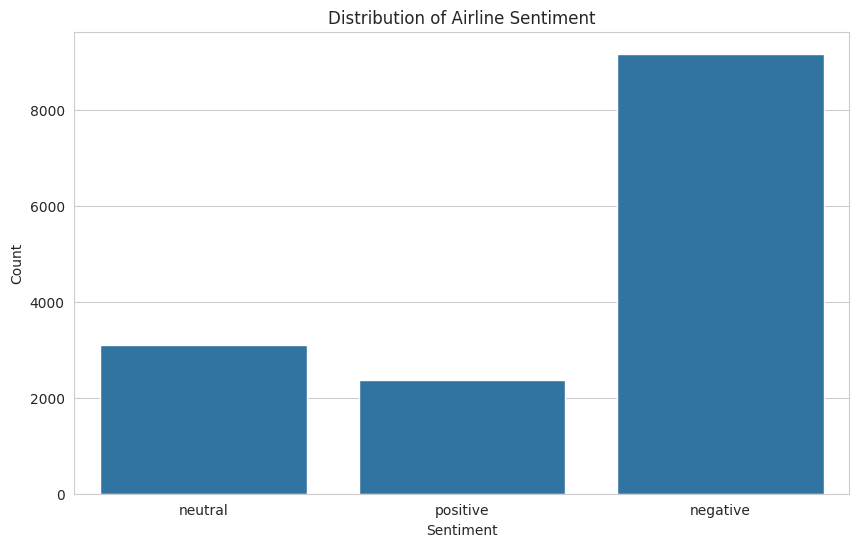

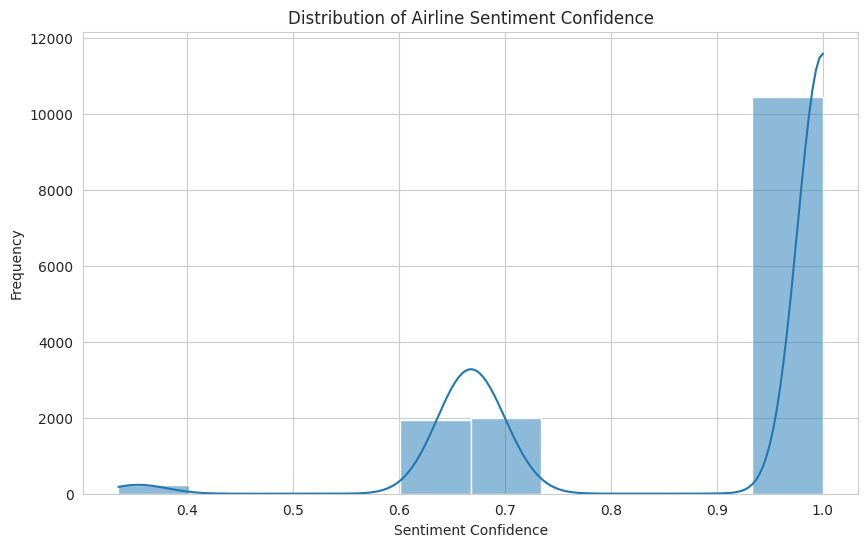

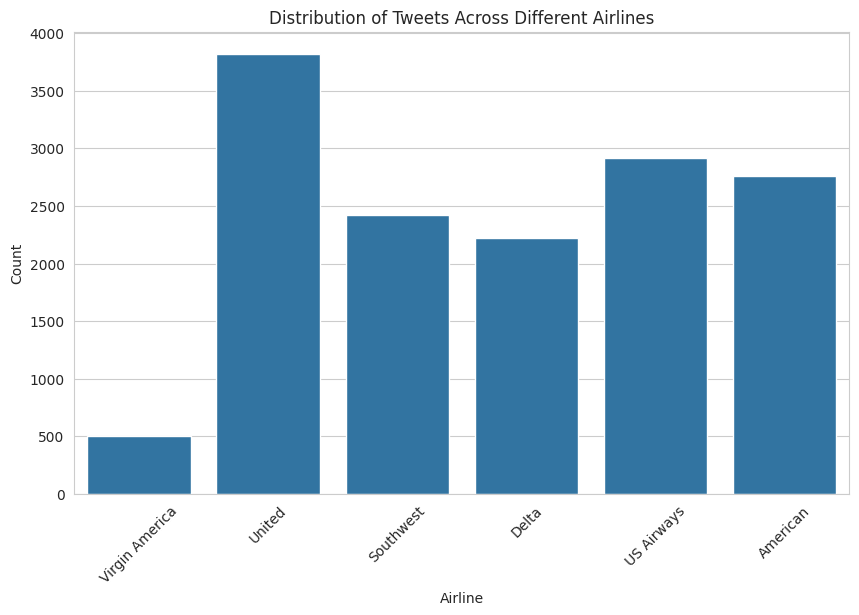

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Plot 1: Distribution of airline_sentiment
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='airline_sentiment')
plt.title('Distribution of Airline Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Plot 2: Distribution of airline_sentiment_confidence
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='airline_sentiment_confidence', bins=10, kde=True)
plt.title('Distribution of Airline Sentiment Confidence')
plt.xlabel('Sentiment Confidence')
plt.ylabel('Frequency')
plt.show()

# Plot 3: Distribution of tweets across different airlines
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='airline')
plt.title('Distribution of Tweets Across Different Airlines')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
display(dataset.head(40))
#drop tweet_id, airline_sentiment_gold, tweet coord, tweet created
columns_to_drop = ['tweet_id', 'airline_sentiment_gold', 'negativereason_gold','tweet_coord', 'tweet_created']
dataset.drop(columns = columns_to_drop, inplace=True)



,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,Unknown,0.638298,Virgin America,Unknown,cairdin,Unknown,0,@VirginAmerica What @dhepburn said.,Unknown,2015-02-24 11:35:52 -0800,Unknown,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,Unknown,0.000000,Virgin America,Unknown,jnardino,Unknown,0,@VirginAmerica plus you've added commercials t...,Unknown,2015-02-24 11:15:59 -0800,Unknown,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,Unknown,0.638298,Virgin America,Unknown,yvonnalynn,Unknown,0,@VirginAmerica I didn't today... Must mean I n...,Unknown,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.703300,Virgin America,Unknown,jnardino,Unknown,0,@VirginAmerica it's really aggressive to blast...,Unknown,2015-02-24 11:15:36 -0800,Unknown,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.000000,Virgin America,Unknown,jnardino,Unknown,0,@VirginAmerica and it's a really big bad thing...,Unknown,2015-02-24 11:14:45 -0800,Unknown,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.684200,Virgin America,Unknown,jnardino,Unknown,0,@VirginAmerica seriously would pay $30 a fligh...,Unknown,2015-02-24 11:14:33 -0800,Unknown,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,Unknown,0.000000,Virgin America,Unknown,cjmcginnis,Unknown,0,"@VirginAmerica yes, nearly every time I fly VX...",Unknown,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,Unknown,0.638298,Virgin America,Unknown,pilot,Unknown,0,@VirginAmerica Really missed a prime opportuni...,Unknown,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,Unknown,0.638298,Virgin America,Unknown,dhepburn,Unknown,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",Unknown,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,Unknown,0.638298,Virgin America,Unknown,YupitsTate,Unknown,0,"@VirginAmerica it was amazing, and arrived an ...",Unknown,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [ ]:
# convert to categorical airline_sentiment, negativereason, airline, name, tweet_location, user_timezone
columns_to_convert = ['airline_sentiment', 'negativereason', 'airline', 'name', 'tweet_location', 'user_timezone']
for col in columns_to_convert:
    dataset[col] = dataset[col].astype('category')
    dataset[col] = dataset[col].cat.codes
print(dataset)

       airline_sentiment  airline_sentiment_confidence  negativereason  \
0                      1                        1.0000               9   
1                      2                        0.3486               9   
2                      1                        0.6837               9   
3                      0                        1.0000               0   
4                      0                        1.0000               1   
...                  ...                           ...             ...   
14635                  2                        0.3487               9   
14636                  0                        1.0000               3   
14637                  1                        1.0000               9   
14638                  0                        1.0000               3   
14639                  1                        0.6771               9   

       negativereason_confidence  airline  name  retweet_count  \
0                       0.638298        5  40

In [ ]:
display(dataset)

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_location,user_timezone
0,1,1.0000,9,0.638298,5,4049,0,@VirginAmerica What @dhepburn said.,2446,31
1,2,0.3486,9,0.000000,5,5395,0,@VirginAmerica plus you've added commercials t...,2446,62
2,1,0.6837,9,0.638298,5,7678,0,@VirginAmerica I didn't today... Must mean I n...,1219,27
3,0,1.0000,0,0.703300,5,5395,0,@VirginAmerica it's really aggressive to blast...,2446,62
4,0,1.0000,1,1.000000,5,5395,0,@VirginAmerica and it's a really big bad thing...,2446,62
...,...,...,...,...,...,...,...,...,...,...
14635,2,0.3487,9,0.000000,0,1793,0,@AmericanAir thank you we got on a different f...,2446,81
14636,0,1.0000,3,1.000000,0,5167,0,@AmericanAir leaving over 20 minutes Late Flig...,2324,81
14637,1,1.0000,9,0.638298,0,6878,0,@AmericanAir Please bring American Airlines to...,1670,81
14638,0,1.0000,3,0.665900,0,2995,0,"@AmericanAir you have my money, you change my ...",1599,31


In [ ]:
print(dataset.isnull().sum())

airline_sentiment               0
airline_sentiment_confidence    0
negativereason                  0
negativereason_confidence       0
airline                         0
name                            0
retweet_count                   0
text                            0
tweet_location                  0
user_timezone                   0
dtype: int64


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

nltk.download('stopwords')
nltk.download('punkt')

text_data = dataset['text']

stop_words = set(stopwords.words('english'))
tokenized_texts = []
for text in text_data:
    word_tokens = word_tokenize(text)
    filtered_tokens = [word.lower() for word in word_tokens if word.lower() not in stop_words]
    tokenized_texts.append(' '.join(filtered_tokens))

max_words = 10000  # Maximum number of words (features)

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(tokenized_texts)
sequences = tokenizer.texts_to_sequences(tokenized_texts)

# Pad sequences to ensure uniform length for neural network input
max_sequence_length = 200
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
print(padded_sequences)

[[   0    0    0 ...   36 6511  148]
 [   0    0    0 ... 2397  126 6512]
 [   0    0    0 ...   92   86  122]
 ...
 [   0    0    0 ...  549  359  170]
 [   0    0    0 ... 1355   69 2559]
 [   0    0    0 ...   83  111    2]]


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# X_text = padded_sequences

# other_features = dataset.drop(columns=['text', 'airline_sentiment'])
# X_other = other_features.to_numpy()
# X = np.concatenate((X_text, X_other), axis=1)
X = padded_sequences

# Target variable
y = dataset['airline_sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("Train data shape:", X_train.shape, y_train.shape)
print("Test data shape:", X_test.shape, y_test.shape)
print("Validation data shape:", X_val.shape, y_val.shape)

Train data shape: (9369, 200) (9369,)
Test data shape: (2928, 200) (2928,)
Validation data shape: (2343, 200) (2343,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
# Check if CUDA is available and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

Using device: cuda


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

# Assuming X_train, y_train, X_val, and y_val are already defined and preprocessed
X_train_tensor = torch.tensor(X_train, dtype=torch.long).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long).to(device)
X_val_tensor = torch.tensor(X_val, dtype=torch.long).to(device)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.long).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long).to(device)

train_data = TensorDataset(X_train_tensor, y_train_tensor)
val_data = TensorDataset(X_val_tensor, y_val_tensor)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32)

test_data = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_data, batch_size=32)


class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, drop_prob=0.5):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)
        self.dropout = nn.Dropout(drop_prob)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, _ = self.lstm(embedded)
        out = self.dropout(lstm_out[:, -1])
        out = self.fc(out)
        return out


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

X_train_tensor = torch.tensor(X_train, dtype=torch.long).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long).to(device)
X_val_tensor = torch.tensor(X_val, dtype=torch.long).to(device)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.long).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long).to(device)

train_data = TensorDataset(X_train_tensor, y_train_tensor)
val_data = TensorDataset(X_val_tensor, y_val_tensor)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32)

test_data = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_data, batch_size=32)


class LSTMModel(nn.Module):
    def __init__(self, vocab_size,output_dim,params):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, params['embedding_dim'])
        self.lstm = nn.LSTM(params['embedding_dim'], params['hidden_dim'],params['n_layers'], dropout=params['drop_prob'], batch_first=True)
        self.dropout = nn.Dropout(params['drop_prob'])
        self.fc = nn.Linear(params['hidden_dim'], output_dim)

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, _ = self.lstm(embedded)
        out = self.dropout(lstm_out[:, -1])
        out = self.fc(out)
        return out

Using device: cuda


In [ ]:
vocab_size = max_words + 1
embedding_dim = 400
hidden_dim = 256
output_dim = len(set(y_train))
n_layers = 3
model = LSTMModel(vocab_size, embedding_dim, hidden_dim, output_dim, n_layers).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

def calculate_accuracy(y_pred, y):
    _, predicted = torch.max(y_pred, 1)
    correct = (predicted == y).float()
    accuracy = correct.sum() / len(correct)
    return accuracy

epochs = 5
best_val_loss = float('inf')
train_losses = []
val_losses_epochs = []
val_accuracies = []
test_accuracies = []

for epoch in range(epochs):
    model.train()
    epoch_losses = []
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        output = model(inputs)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        epoch_losses.append(loss.item())

    train_losses.append(sum(epoch_losses) / len(epoch_losses))

    model.eval()
    val_losses = []
    val_accuracy = []
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            output = model(inputs)
            val_loss = criterion(output, labels)
            val_losses.append(val_loss.item())
            acc = calculate_accuracy(output, labels)
            val_accuracy.append(acc.item())

    val_loss_epoch = sum(val_losses) / len(val_losses)
    val_losses_epochs.append(val_loss_epoch)
    avg_val_accuracy = sum(val_accuracy) / len(val_accuracy)
    val_accuracies.append(avg_val_accuracy)

    if val_loss_epoch < best_val_loss:
        best_val_loss = val_loss_epoch
        best_model_weights = model.state_dict().copy()

    test_accuracy = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            output = model(inputs)
            acc = calculate_accuracy(output, labels)
            test_accuracy.append(acc.item())

    avg_test_accuracy = sum(test_accuracy) / len(test_accuracy)
    test_accuracies.append(avg_test_accuracy)

    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {train_losses[-1]}, Validation Loss: {val_losses_epochs[-1]}, Validation Accuracy: {val_accuracies[-1]}, Test Accuracy: {avg_test_accuracy}")


In [ ]:
import torch.optim as optim
import torch.nn.functional as F

def calculate_accuracy(y_pred, y):
  _, predicted = torch.max(y_pred, 1)
  correct = (predicted == y).float()
  accuracy = correct.sum() / len(correct)
  return accuracy



def train(model,params):
  optimizer = getattr(optim, params['optimizer'])(model.parameters(), lr= params['learning_rate'])
  criterion = getattr(F, params['loss'])
  epochs = 5
  best_val_loss = float('inf')
  train_losses = []
  val_losses_epochs = []
  val_accuracies = []
  test_accuracies = []

  for epoch in range(epochs):
    model.train()
    epoch_losses = []
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        output = model(inputs)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        epoch_losses.append(loss.item())

    train_losses.append(sum(epoch_losses) / len(epoch_losses))

    model.eval()
    val_losses = []
    val_accuracy = []
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            output = model(inputs)
            val_loss = criterion(output, labels)
            val_losses.append(val_loss.item())
            acc = calculate_accuracy(output, labels)
            val_accuracy.append(acc.item())

    val_loss_epoch = sum(val_losses) / len(val_losses)
    val_losses_epochs.append(val_loss_epoch)
    avg_val_accuracy = sum(val_accuracy) / len(val_accuracy)
    val_accuracies.append(avg_val_accuracy)

    if val_loss_epoch < best_val_loss:
        best_val_loss = val_loss_epoch
        best_model_weights = model.state_dict().copy()

    test_accuracy = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            output = model(inputs)
            acc = calculate_accuracy(output, labels)
            test_accuracy.append(acc.item())

    avg_test_accuracy = sum(test_accuracy) / len(test_accuracy)
    test_accuracies.append(avg_test_accuracy)

    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {train_losses[-1]}, Validation Loss: {val_losses_epochs[-1]}, Validation Accuracy: {val_accuracies[-1]}, Test Accuracy: {avg_test_accuracy}")
    return val_losses_epochs[-1]


In [ ]:
def objective(trial):
    output_dim=output_dim = len(set(y_train))
    vocab_size = max_words + 1
    embedding_dim = [300,400,500]
    hidden_dim = [256,356,456]
    output_dim = len(set(y_train))
    n_layers = [1,2,3]
    bidirectional=[True,False]
    drop_prob=[0.2,0.5,0.7]
    learning_rate=[0.01,0.1]


    params={'embedding_dim':trial.suggest_categorical('embedding_dim',embedding_dim),
            'hidden_dim':trial.suggest_categorical('hidden_dim',hidden_dim),
            'optimizer':trial.suggest_categorical('optimizer',["Adam",'SGD','RMSprop']),
            'n_layers':trial.suggest_categorical('n_layers',n_layers),
            'bidirectional':trial.suggest_categorical('bidirectional',bidirectional),
           'drop_prob':trial.suggest_categorical('drop_prob',drop_prob),
           'learning_rate':trial.suggest_categorical('learning_rate',learning_rate),
           'loss':trial.suggest_categorical('loss',['cross_entropy'])}

    #model = LSTMModel(vocab_size, embedding_dim, hidden_dim, output_dim, n_layers).to(device)

    model=LSTMModel(vocab_size,output_dim,params) .to(device)
    mse=train(model,params)
    return mse

In [ ]:
!pip install optuna
import optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 12.1 MB/s eta 0:00:00


In [ ]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=2)

[I 2024-03-08 00:27:13,268] A new study created in memory with name: no-name-72c7acc0-3e02-4dab-b5e3-3823fa71001c
<ipython-input-54-93cd1fc7d03f>:29: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = criterion(output, labels)
[W 2024-03-08 00:27:14,135] Trial 0 failed with parameters: {'embedding_dim': 500, 'hidden_dim': 256, 'optimizer': 'RMSprop', 'n_layers': 2, 'bidirectional': True, 'drop_prob': 0.7, 'learning_rate': 0.01, 'loss': 'mse_loss'} because of the following error: RuntimeError('The size of tensor a (3) must match the size of tensor b (32) at non-singleton dimension 1').
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-55-330d456fc0c7>", line 25, in objective
   

RuntimeError: The size of tensor a (3) must match the size of tensor b (32) at non-singleton dimension 1

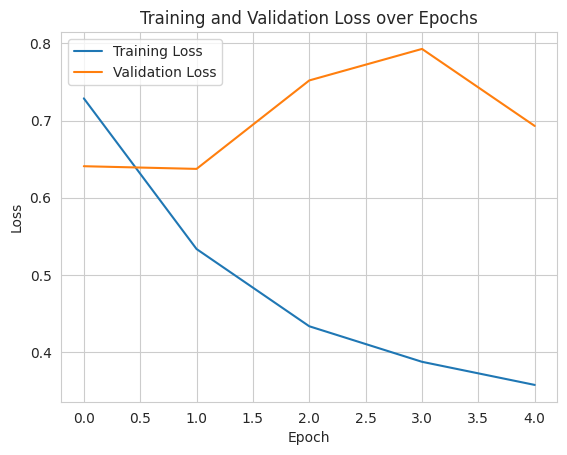

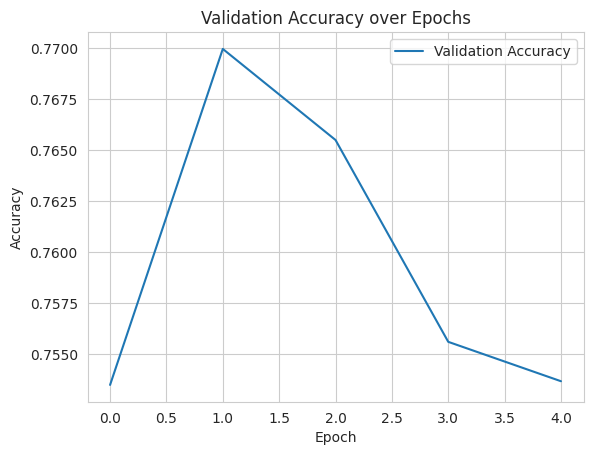

In [ ]:
# Save the best model weights
torch.save(best_model_weights, '/content/best_model_weights_part4_lstm.h5')

# Plotting the training and validation loss
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses_epochs, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss over Epochs')
plt.show()

# Plotting the validation accuracy
plt.figure()
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Validation Accuracy over Epochs')
plt.show()

#Hyperparameter Tuning

# Improved LSTM (GRU)

In [ ]:
class GRUModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, drop_prob=0.5):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.gru = nn.GRU(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)
        self.dropout = nn.Dropout(drop_prob)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        embedded = self.embedding(x)
        gru_out, _ = self.gru(embedded)
        out = self.dropout(gru_out[:, -1])
        out = self.fc(out)
        return out


In [ ]:
vocab_size = max_words + 1
embedding_dim = 400
hidden_dim = 128
output_dim = len(set(y_train))
n_layers = 2
model = GRUModel(vocab_size, embedding_dim, hidden_dim, output_dim, n_layers).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

def calculate_accuracy(y_pred, y):
    _, predicted = torch.max(y_pred, 1)
    correct = (predicted == y).float()
    accuracy = correct.sum() / len(correct)
    return accuracy

epochs = 5
best_val_loss = float('inf')
train_losses = []
val_losses_epochs = []
val_accuracies = []
test_accuracies = []

for epoch in range(epochs):
    model.train()
    epoch_losses = []
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        output = model(inputs)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        epoch_losses.append(loss.item())

    train_losses.append(sum(epoch_losses) / len(epoch_losses))

    model.eval()
    val_losses = []
    val_accuracy = []
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            output = model(inputs)
            val_loss = criterion(output, labels)
            val_losses.append(val_loss.item())
            acc = calculate_accuracy(output, labels)
            val_accuracy.append(acc.item())

    val_loss_epoch = sum(val_losses) / len(val_losses)
    val_losses_epochs.append(val_loss_epoch)
    avg_val_accuracy = sum(val_accuracy) / len(val_accuracy)
    val_accuracies.append(avg_val_accuracy)

    if val_loss_epoch < best_val_loss:
        best_val_loss = val_loss_epoch
        best_model_weights = model.state_dict().copy()

    test_accuracy = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            output = model(inputs)
            acc = calculate_accuracy(output, labels)
            test_accuracy.append(acc.item())

    avg_test_accuracy = sum(test_accuracy) / len(test_accuracy)
    test_accuracies.append(avg_test_accuracy)

    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {train_losses[-1]}, Validation Loss: {val_losses_epochs[-1]}, Validation Accuracy: {val_accuracies[-1]}, Test Accuracy: {avg_test_accuracy}")



In [ ]:
class GRUModel(nn.Module):
    def __init__(self, vocab_size,output_dim,params):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim,params)
        self.gru = nn.GRU(params['embedding_dim'], params['hidden_dim'], params['n_layers'], drop_prob=params['dropout'], batch_first=True)
        self.dropout = nn.Dropout(drop_prob)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        embedded = self.embedding(x)
        gru_out, _ = self.gru(embedded)
        out = self.dropout(gru_out[:, -1])
        out = self.fc(out)
        return out

In [ ]:
import torch.optim as optim
import torch.nn.functional as F

def calculate_accuracy(y_pred, y):
    _, predicted = torch.max(y_pred, 1)
    correct = (predicted == y).float()
    accuracy = correct.sum() / len(correct)
    return accuracy



def train(model,params):
    optimizer = getattr(optim, params['optimizer'])(model.parameters(), lr= params['learning_rate'])
    criterion = getattr(F, params['loss'])
    epochs = 1
    best_val_loss = float('inf')
    train_losses = []
    val_losses_epochs = []
    val_accuracies = []
    test_accuracies = []

    for epoch in range(epochs):
        model.train()
        epoch_losses = []
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            output = model(inputs)
            #print(output)
            #print(output.shape)
            #print(labels.shape)
            #print(labels)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            epoch_losses.append(loss.item())

        train_losses.append(sum(epoch_losses) / len(epoch_losses))

        model.eval()
        val_losses = []
        val_accuracy = []
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                output = model(inputs)
                val_loss = criterion(output, labels)
                val_losses.append(val_loss.item())
                acc = calculate_accuracy(output, labels)
                val_accuracy.append(acc.item())

        val_loss_epoch = sum(val_losses) / len(val_losses)
        val_losses_epochs.append(val_loss_epoch)
        avg_val_accuracy = sum(val_accuracy) / len(val_accuracy)
        val_accuracies.append(avg_val_accuracy)

        if val_loss_epoch < best_val_loss:
            best_val_loss = val_loss_epoch
            best_model_weights = model.state_dict().copy()

        test_accuracy = []
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                output = model(inputs)
                acc = calculate_accuracy(output, labels)
                test_accuracy.append(acc.item())

        avg_test_accuracy = sum(test_accuracy) / len(test_accuracy)
        test_accuracies.append(avg_test_accuracy)

        print(f"Epoch {epoch+1}/{epochs}, Training Loss: {train_losses[-1]}, Validation Loss: {val_losses_epochs[-1]}, Validation Accuracy: {val_accuracies[-1]}, Test Accuracy: {avg_test_accuracy}")
        return val_losses_epochs[-1]


In [ ]:
def objective(trial):
    output_dim=output_dim = len(set(y_train))
    vocab_size = max_words + 1
    embedding_dim = [300,400,500]
    hidden_dim = [256,356,456]
    output_dim = len(set(y_train))
    n_layers = [1,2,3]
    bidirectional=[True]
    drop_prob=[0.2,0.5,0.7]
    learning_rate=[0.01,0.1]


    params={'embedding_dim':trial.suggest_categorical('embedding_dim',embedding_dim),
            'hidden_dim':trial.suggest_categorical('hidden_dim',hidden_dim),
            'optimizer':trial.suggest_categorical('optimizer',["Adam",'SGD','RMSprop']),
            'n_layers':trial.suggest_categorical('n_layers',n_layers),
            'bidirectional':trial.suggest_categorical('bidirectional',bidirectional),
           'drop_prob':trial.suggest_categorical('drop_prob',drop_prob),
           'learning_rate':trial.suggest_categorical('learning_rate',learning_rate),
           'loss':trial.suggest_categorical('loss',['cross_entropy'])}

    #model = LSTMModel(vocab_size, embedding_dim, hidden_dim, output_dim, n_layers).to(device)

    model=GRUModel(vocab_size,output_dim,params) .to(device)
    acc=train(model,params)
    return acc

In [ ]:
!pip install optuna
import optuna

In [ ]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=243)

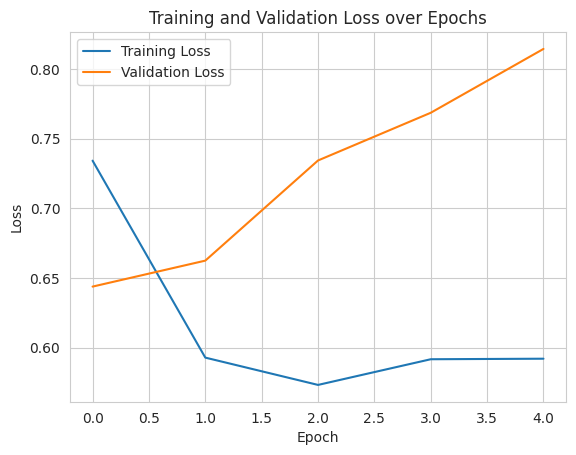

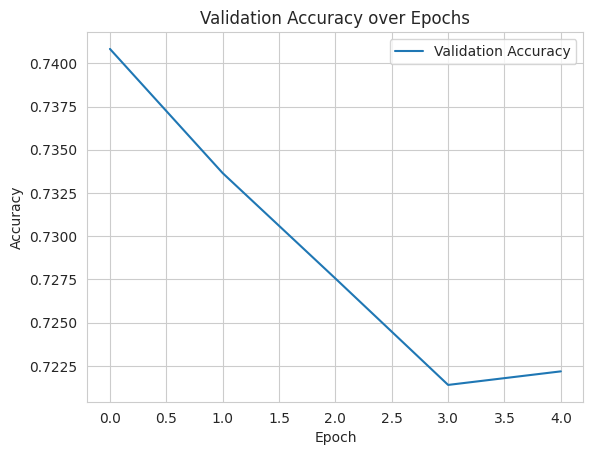

In [ ]:
# Save the best model weights
torch.save(best_model_weights, '/content/best_model_weights_part4_gru.h5')

# Plotting the training and validation loss
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses_epochs, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss over Epochs')
plt.show()

# Plotting the validation accuracy
plt.figure()
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Validation Accuracy over Epochs')
plt.show()